# **Práctica 13: Pronóstico (Árboles de decisión y Bosques Aleatorios)**

Nombre:Meza Vega Hugo Adrián

No. Cuenta: 314344580

Email: hamv1509@gmail.com

### **Contexto**

Yahoo Finance ofrece una amplia variedad de datos de mercado sobre acciones, bonos, divisas y criptomonedas. También proporciona informes de noticias con varios puntos de vista sobre diferentes mercados de todo el mundo, todos accesibles a través de la biblioteca yfinance.

**Objetivo:** Hacer un pronóstico del precio de las acciones a través de un algoritmo de aprendizaje automático.

**Fuente de datos**

De Yahoo Finanzas se utiliza el Ticker -Etiqueta de cotización- de la acción bursatil.

### **Importar las bibliotecas y los datos**

In [1]:
#!pip install yfinance
#!pip install googlefinance

In [2]:
"LIVEPOL1.MX"

'LIVEPOL1.MX'

In [3]:
import pandas as pd               # Para la manipulación y análisis de datos
import numpy as np                # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt   # Para la generación de gráficas a partir de los datos
import seaborn as sns             # Para la visualización de datos basado en matplotlib
%matplotlib inline             
# Para generar y almacenar los gráficos dentro del cuaderno
import yfinance as yf

In [4]:
# Para Liverpool
DataLiverpool = yf.Ticker('LIVEPOL1.MX')

In [5]:
LiverpoolHist = DataLiverpool.history(start = '2015-1-1', end = '2022-11-22', interval='1d')
LiverpoolHist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-01-02 00:00:00-06:00,136.625473,136.625473,136.625473,136.625473,0,0.0,0
2015-01-05 00:00:00-06:00,136.625473,136.625473,136.625473,136.625473,0,0.0,0
2015-01-06 00:00:00-06:00,136.625473,136.625473,136.625473,136.625473,0,0.0,0
2015-01-07 00:00:00-06:00,136.625473,136.625473,136.625473,136.625473,0,0.0,0
2015-01-08 00:00:00-06:00,136.625473,136.625473,136.625473,136.625473,0,0.0,0
...,...,...,...,...,...,...,...
2022-11-14 00:00:00-06:00,105.000000,105.000000,105.000000,105.000000,0,0.0,0
2022-11-15 00:00:00-06:00,105.000000,105.000000,105.000000,105.000000,1364,0.0,0
2022-11-16 00:00:00-06:00,105.000000,105.000000,105.000000,105.000000,0,0.0,0


Descripción:

* En el comercio de acciones, 'alto' y 'bajo' se refieren a los precios máximos y mínimos en un período determinado.
* 'Apertura' y 'cierre' son los precios en los que una acción comenzó y terminó cotizando en el mismo período. 
* El 'volumen' es la cantidad total de la actividad comercial. 
* Los valores ajustados tienen en cuenta las acciones corporativas, como los 'dividendos', la 'división de acciones' y la emisión de nuevas acciones.

### **Descripción de la estructura de los datos**

Se puede usar **info()** para obtener el tipo de datos y la suma de valores nulos. Se observa que los datos son numéricos (flotante y entero).

In [6]:
LiverpoolHist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1985 entries, 2015-01-02 00:00:00-06:00 to 2022-11-18 00:00:00-06:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1985 non-null   float64
 1   High          1985 non-null   float64
 2   Low           1985 non-null   float64
 3   Close         1985 non-null   float64
 4   Volume        1985 non-null   int64  
 5   Dividends     1985 non-null   float64
 6   Stock Splits  1985 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 124.1 KB


In [7]:
LiverpoolHist.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000,1985.0
mean,120.302514,120.429779,120.153723,120.375395,3494.076071,0.005829,0.0
std,39.902253,39.980890,39.799414,40.007815,33785.127260,0.061916,0.0
min,50.234245,50.234245,50.234245,50.234245,0.000000,0.000000,0.0
25%,95.287949,95.287949,95.287949,95.287949,0.000000,0.000000,0.0
50%,114.146042,114.146042,114.126953,114.146042,0.000000,0.000000,0.0
75%,147.780884,147.793639,145.978674,148.681976,18.000000,0.000000,0.0
max,218.822083,218.822083,218.822083,218.822083,592624.000000,1.020000,0.0


* Se incluye un recuento, media, desviación, valor mínimo, valor máximo, percentil inferior (25%), 50% y percentil superior (75%).
* Por defecto, el percentil 50 es lo mismo que la mediana.
* Se observa que para cada variable, el recuento también ayuda a identificar variables con valores nulos o vacios. Estos son: **Dividends** y **Stock Splits**.

### **Gráfica de los precios de las acciones**

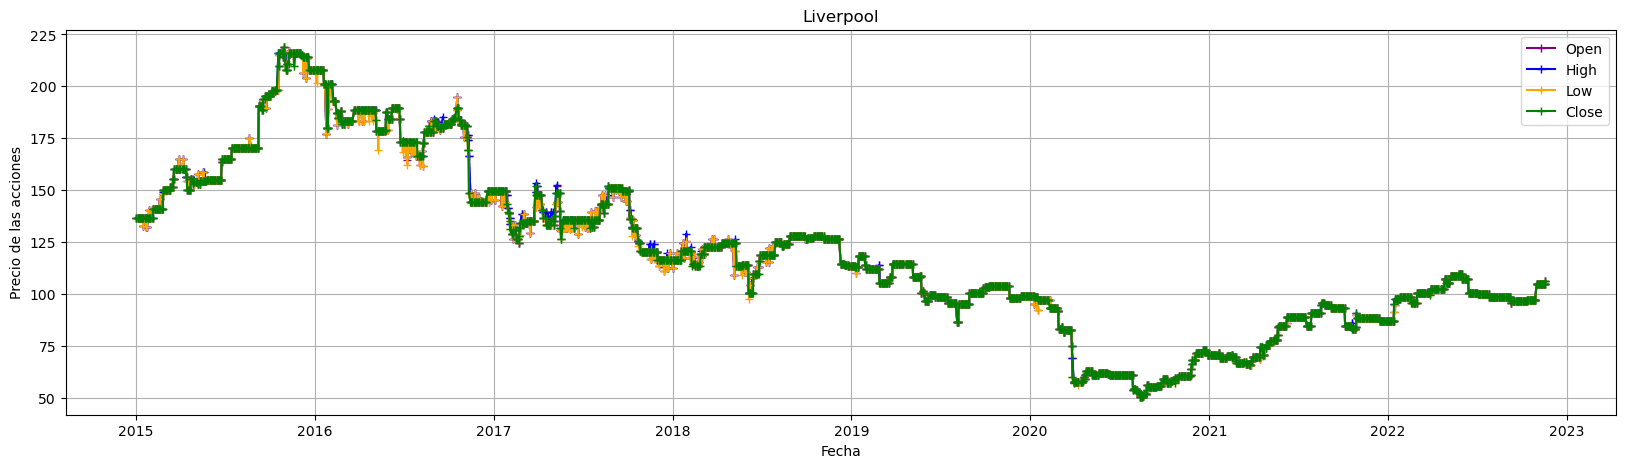

In [8]:
plt.figure(figsize=(20, 5))
plt.plot(LiverpoolHist['Open'], color='purple', marker='+', label='Open')
plt.plot(LiverpoolHist['High'], color='blue', marker='+', label='High')
plt.plot(LiverpoolHist['Low'], color='orange', marker='+', label='Low')
plt.plot(LiverpoolHist['Close'], color='green', marker='+', label='Close')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Liverpool')
plt.grid(True)
plt.legend()
plt.show()

In [9]:
MDatos = LiverpoolHist.drop(columns = ['Volume', 'Dividends', 'Stock Splits'])
MDatos

,Open,High,Low,Close
Date,,,,
2015-01-02 00:00:00-06:00,136.625473,136.625473,136.625473,136.625473
2015-01-05 00:00:00-06:00,136.625473,136.625473,136.625473,136.625473
2015-01-06 00:00:00-06:00,136.625473,136.625473,136.625473,136.625473
2015-01-07 00:00:00-06:00,136.625473,136.625473,136.625473,136.625473
2015-01-08 00:00:00-06:00,136.625473,136.625473,136.625473,136.625473
...,...,...,...,...
2022-11-14 00:00:00-06:00,105.000000,105.000000,105.000000,105.000000
2022-11-15 00:00:00-06:00,105.000000,105.000000,105.000000,105.000000
2022-11-16 00:00:00-06:00,105.000000,105.000000,105.000000,105.000000


In [10]:
# En caso de tener valores nulos
MDatos = MDatos.dropna()
MDatos

,Open,High,Low,Close
Date,,,,
2015-01-02 00:00:00-06:00,136.625473,136.625473,136.625473,136.625473
2015-01-05 00:00:00-06:00,136.625473,136.625473,136.625473,136.625473
2015-01-06 00:00:00-06:00,136.625473,136.625473,136.625473,136.625473
2015-01-07 00:00:00-06:00,136.625473,136.625473,136.625473,136.625473
2015-01-08 00:00:00-06:00,136.625473,136.625473,136.625473,136.625473
...,...,...,...,...
2022-11-14 00:00:00-06:00,105.000000,105.000000,105.000000,105.000000
2022-11-15 00:00:00-06:00,105.000000,105.000000,105.000000,105.000000
2022-11-16 00:00:00-06:00,105.000000,105.000000,105.000000,105.000000


### Aplicación del algoritmo - Árbol de decisión

In [11]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Se seleccionan las variables predictoras (X) y la variable a pronosticar (Y)

In [12]:
X = np.array(MDatos[['Open',
                     'High',
                     'Low']])
pd.DataFrame(X)

,0,1,2
0,136.625473,136.625473,136.625473
1,136.625473,136.625473,136.625473
2,136.625473,136.625473,136.625473
3,136.625473,136.625473,136.625473
4,136.625473,136.625473,136.625473
...,...,...,...
1980,105.000000,105.000000,105.000000
1981,105.000000,105.000000,105.000000
1982,105.000000,105.000000,105.000000
1983,105.000000,105.000000,105.000000


In [13]:
Y = np.array(MDatos[['Close']])
pd.DataFrame(Y)

,0
0,136.625473
1,136.625473
2,136.625473
3,136.625473
4,136.625473
...,...
1980,105.000000
1981,105.000000
1982,105.000000
1983,105.000000


Se hace la división de los datos

In [14]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, 
                                                                    test_size = 0.2, 
                                                                    random_state = 0, 
                                                                    shuffle = True)

In [15]:
pd.DataFrame(X_test)

,0,1,2
0,86.902100,86.902100,86.902100
1,55.358078,55.358078,55.358078
2,144.176468,144.176468,144.176468
3,131.619406,135.690109,131.619406
4,100.292686,100.292686,100.292686
...,...,...,...
392,95.626003,95.626003,95.429245
393,144.736110,144.736110,144.736110
394,135.165421,135.165421,135.165421
395,68.932220,68.932220,68.932220


Se entrena el modelo

In [66]:
PronosticoAD = DecisionTreeRegressor(random_state=0)
PronosticoAD.fit(X_train, Y_train)

#PronosticoAD = DecisionTreeRegressor(max_depth=16, min_samples_split=4, min_samples_leaf=2, random_state=0)
#PronosticoAD.fit(X_train, Y_train)


DecisionTreeRegressor(random_state=0)

In [67]:
#Se genera el pronóstico
Y_PronosticoAD = PronosticoAD.predict(X_test)
pd.DataFrame(Y_PronosticoAD)

,0
0,86.902100
1,55.358078
2,144.176468
3,135.690109
4,100.292686
...,...
392,95.516380
393,149.349579
394,135.165421
395,68.932220


In [68]:
Valores = pd.DataFrame(Y_test, Y_PronosticoAD)
Valores

,0
86.902100,86.902100
55.358078,55.358078
144.176468,144.176468
135.690109,135.690109
100.292686,100.292686
...,...
95.516380,95.429245
149.349579,149.349579
135.165421,135.165421
68.932220,68.932220


In [69]:
r2_score(Y_test, Y_PronosticoAD)

0.9985284130613273

In [70]:
print('Criterio: \n', PronosticoAD.criterion)
print('Importancia variables: \n', PronosticoAD.feature_importances_)
print("MAE: %.4f" % mean_absolute_error(Y_test, Y_PronosticoAD))
print("MSE: %.4f" % mean_squared_error(Y_test, Y_PronosticoAD))
print("RMSE: %.4f" % mean_squared_error(Y_test, Y_PronosticoAD, squared=False))   #True devuelve MSE, False devuelve RMSE
print('Score: %.4f' % r2_score(Y_test, Y_PronosticoAD))


Criterio: 
 squared_error
Importancia variables: 
 [0.03160951 0.1435455  0.824845  ]
MAE: 0.4053
MSE: 2.4167
RMSE: 1.5546
Score: 0.9985


#### **Conformación del modelo de pronóstico**

* Se tiene un Score de 0.9972, que indica que el pronóstico del precio de cierre de la acción se logrará con un 99.7% de efectividad.
* Además, los pronósticos del modelo final se alejan en promedio 3.05 y 1.74 unidades del valor real, esto es, MSE y RMSE, respectivamente.

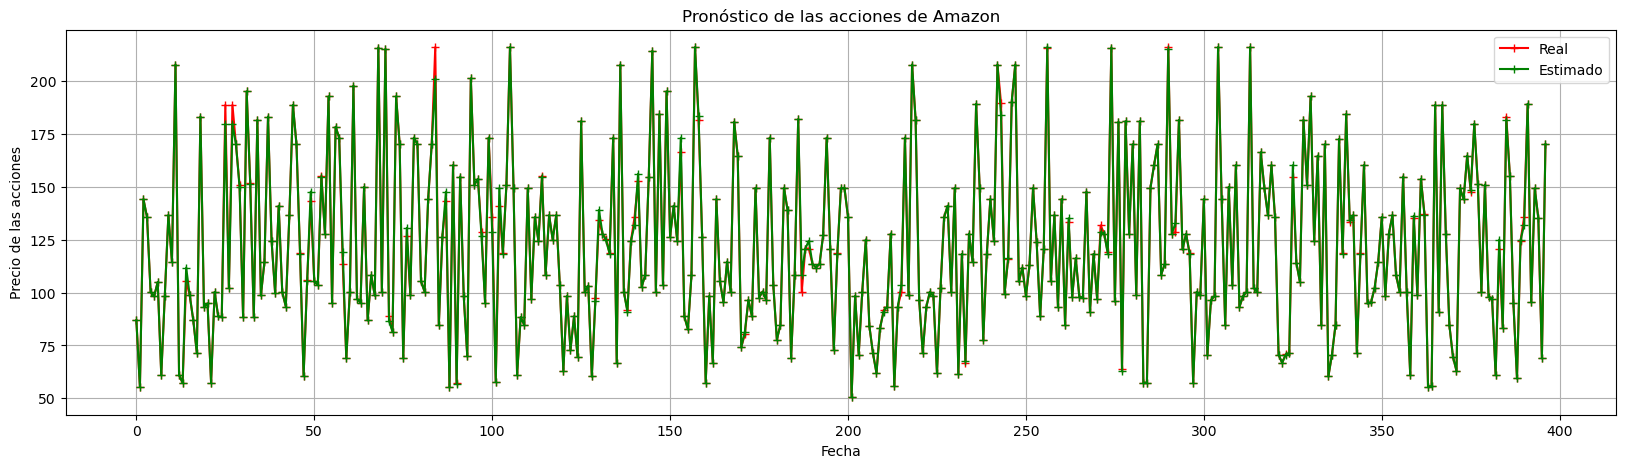

In [71]:
plt.figure(figsize=(20, 5))
plt.plot(Y_test, color='red', marker='+', label='Real')
plt.plot(Y_PronosticoAD, color='green', marker='+', label='Estimado')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Pronóstico de las acciones de Amazon')
plt.grid(True)
plt.legend()
plt.show()

In [72]:
Importancia = pd.DataFrame({'Variable': list(MDatos[['Open', 'High', 'Low']]),
                            'Importancia': PronosticoAD.feature_importances_}).sort_values('Importancia', ascending=False)
Importancia

,Variable,Importancia
2,Low,0.824845
1,High,0.143545
0,Open,0.031610


#### **Conformación del árbol**

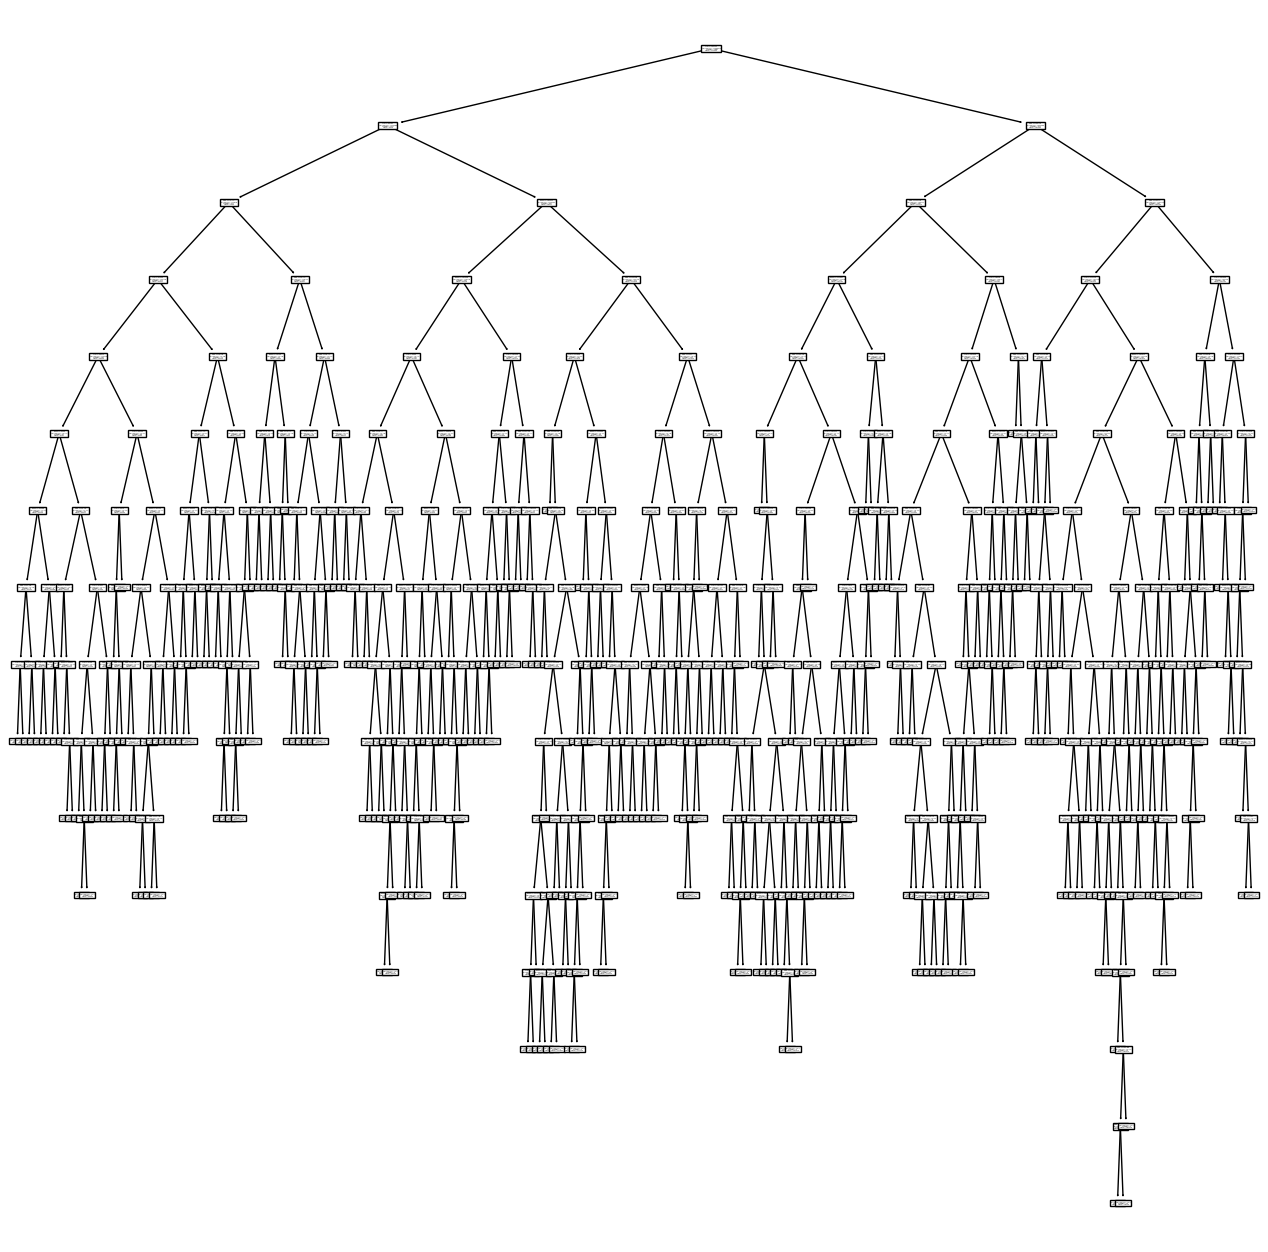

In [73]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16,16))  
plot_tree(PronosticoAD, feature_names = ['Open', 'High', 'Low'])
plt.show()

In [74]:
from sklearn.tree import export_text
Reporte = export_text(PronosticoAD, feature_names = ['Open', 'High', 'Low'])
print(Reporte)

|--- Low <= 128.13
|   |--- Low <= 89.18
|   |   |--- High <= 74.09
|   |   |   |--- Low <= 64.36
|   |   |   |   |--- Low <= 58.47
|   |   |   |   |   |--- Open <= 53.96
|   |   |   |   |   |   |--- Open <= 52.09
|   |   |   |   |   |   |   |--- High <= 51.44
|   |   |   |   |   |   |   |   |--- Low <= 50.45
|   |   |   |   |   |   |   |   |   |--- value: [50.23]
|   |   |   |   |   |   |   |   |--- Low >  50.45
|   |   |   |   |   |   |   |   |   |--- value: [50.68]
|   |   |   |   |   |   |   |--- High >  51.44
|   |   |   |   |   |   |   |   |--- Low <= 51.62
|   |   |   |   |   |   |   |   |   |--- value: [51.61]
|   |   |   |   |   |   |   |   |--- Low >  51.62
|   |   |   |   |   |   |   |   |   |--- value: [51.62]
|   |   |   |   |   |   |--- Open >  52.09
|   |   |   |   |   |   |   |--- Low <= 52.93
|   |   |   |   |   |   |   |   |--- Low <= 52.69
|   |   |   |   |   |   |   |   |   |--- value: [52.55]
|   |   |   |   |   |   |   |   |--- Low >  52.69
|   |   |   |   |   |  

#### **Nuevos pronósticos**

In [65]:
PrecioAccion = pd.DataFrame({'Open': [108.2],
                             'High': [112.2], 
                             'Low': [100.8]})
PronosticoAD.predict(PrecioAccion)

/Users/hugomeza/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


array([101.8675499])

# Bosques aleatorios #

### **Gráfica de los precios de las acciones**

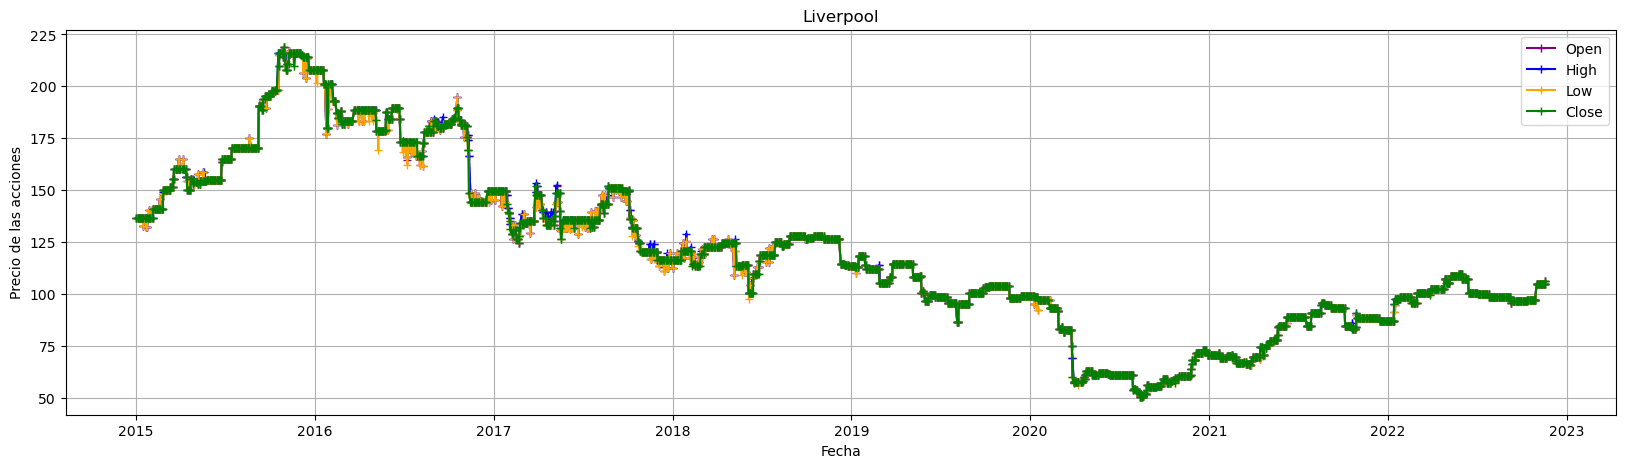

In [29]:
plt.figure(figsize=(20, 5))
plt.plot(LiverpoolHist['Open'], color='purple', marker='+', label='Open')
plt.plot(LiverpoolHist['High'], color='blue', marker='+', label='High')
plt.plot(LiverpoolHist['Low'], color='orange', marker='+', label='Low')
plt.plot(LiverpoolHist['Close'], color='green', marker='+', label='Close')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Liverpool')
plt.grid(True)
plt.legend()
plt.show()

In [30]:
MDatos = LiverpoolHist.drop(columns = ['Volume','Dividends', 'Stock Splits'])
MDatos

,Open,High,Low,Close
Date,,,,
2015-01-02 00:00:00-06:00,136.625473,136.625473,136.625473,136.625473
2015-01-05 00:00:00-06:00,136.625473,136.625473,136.625473,136.625473
2015-01-06 00:00:00-06:00,136.625473,136.625473,136.625473,136.625473
2015-01-07 00:00:00-06:00,136.625473,136.625473,136.625473,136.625473
2015-01-08 00:00:00-06:00,136.625473,136.625473,136.625473,136.625473
...,...,...,...,...
2022-11-14 00:00:00-06:00,105.000000,105.000000,105.000000,105.000000
2022-11-15 00:00:00-06:00,105.000000,105.000000,105.000000,105.000000
2022-11-16 00:00:00-06:00,105.000000,105.000000,105.000000,105.000000


In [31]:
# En caso de tener valores nulos
MDatos = MDatos.dropna()
MDatos

,Open,High,Low,Close
Date,,,,
2015-01-02 00:00:00-06:00,136.625473,136.625473,136.625473,136.625473
2015-01-05 00:00:00-06:00,136.625473,136.625473,136.625473,136.625473
2015-01-06 00:00:00-06:00,136.625473,136.625473,136.625473,136.625473
2015-01-07 00:00:00-06:00,136.625473,136.625473,136.625473,136.625473
2015-01-08 00:00:00-06:00,136.625473,136.625473,136.625473,136.625473
...,...,...,...,...
2022-11-14 00:00:00-06:00,105.000000,105.000000,105.000000,105.000000
2022-11-15 00:00:00-06:00,105.000000,105.000000,105.000000,105.000000
2022-11-16 00:00:00-06:00,105.000000,105.000000,105.000000,105.000000


### Aplicación del algoritmo

In [32]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Se seleccionan las variables predictoras (X) y la variable a pronosticar (Y)

In [33]:
X = np.array(MDatos[['Open',
                     'High',
                     
                     'Low']])
pd.DataFrame(X)

,0,1,2
0,136.625473,136.625473,136.625473
1,136.625473,136.625473,136.625473
2,136.625473,136.625473,136.625473
3,136.625473,136.625473,136.625473
4,136.625473,136.625473,136.625473
...,...,...,...
1980,105.000000,105.000000,105.000000
1981,105.000000,105.000000,105.000000
1982,105.000000,105.000000,105.000000
1983,105.000000,105.000000,105.000000


In [34]:
Y = np.array(MDatos[['Close']])
pd.DataFrame(Y)

,0
0,136.625473
1,136.625473
2,136.625473
3,136.625473
4,136.625473
...,...
1980,105.000000
1981,105.000000
1982,105.000000
1983,105.000000


Se hace la división de los datos

In [35]:
pd.DataFrame(X_test)

,0,1,2
0,86.902100,86.902100,86.902100
1,55.358078,55.358078,55.358078
2,144.176468,144.176468,144.176468
3,131.619406,135.690109,131.619406
4,100.292686,100.292686,100.292686
...,...,...,...
392,95.626003,95.626003,95.429245
393,144.736110,144.736110,144.736110
394,135.165421,135.165421,135.165421
395,68.932220,68.932220,68.932220


Se entrena el modelo

In [36]:
PronosticoBA = RandomForestRegressor(random_state=0)
PronosticoBA.fit(X_train, Y_train)

#PronosticoBA = RandomForestRegressor(n_estimators=100, max_depth=8, min_samples_split=4, min_samples_leaf=2, random_state=0)
#PronosticoBA.fit(X_train, Y_train)


/var/folders/3q/9ndt9tvs4t3csrp6qxw_08c40000gn/T/ipykernel_3857/2815334640.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  PronosticoBA.fit(X_train, Y_train)


RandomForestRegressor(random_state=0)

In [37]:
#Se genera el pronóstico
Y_PronosticoBA = PronosticoBA.predict(X_test)
pd.DataFrame(Y_PronosticoBA)

,0
0,86.902100
1,55.358078
2,144.176468
3,135.678528
4,100.292686
...,...
392,95.452711
393,149.367903
394,135.165421
395,68.922438


In [38]:
Valores = pd.DataFrame(Y_test, Y_PronosticoBA)
Valores

,0
86.902100,86.902100
55.358078,55.358078
144.176468,144.176468
135.678528,135.690109
100.292686,100.292686
...,...
95.452711,95.429245
149.367903,149.349579
135.165421,135.165421
68.922438,68.932220


In [39]:
r2_score(Y_test, Y_PronosticoBA)

0.9988829501287555

In [40]:
print('Criterio: \n', PronosticoBA.criterion)
print('Importancia variables: \n', PronosticoBA.feature_importances_)
print("MAE: %.4f" % mean_absolute_error(Y_test, Y_PronosticoBA))
print("MSE: %.4f" % mean_squared_error(Y_test, Y_PronosticoBA))
print("RMSE: %.4f" % mean_squared_error(Y_test, Y_PronosticoBA, squared=False))   #True devuelve MSE, False devuelve RMSE
print('Score: %.4f' % r2_score(Y_test, Y_PronosticoBA))


Criterio: 
 squared_error
Importancia variables: 
 [0.20672486 0.48525417 0.30802097]
MAE: 0.3945
MSE: 1.8344
RMSE: 1.3544
Score: 0.9989


#### **Conformación del modelo de pronóstico**

* Se tiene un Score de 0.9989, que indica que el pronóstico del precio de cierre de la acción se logrará con un 99.8% de efectividad.
* Además, los pronósticos del modelo final se alejan en promedio 1.73 y 1.31 unidades del valor real, esto es, MSE y RMSE, respectivamente.

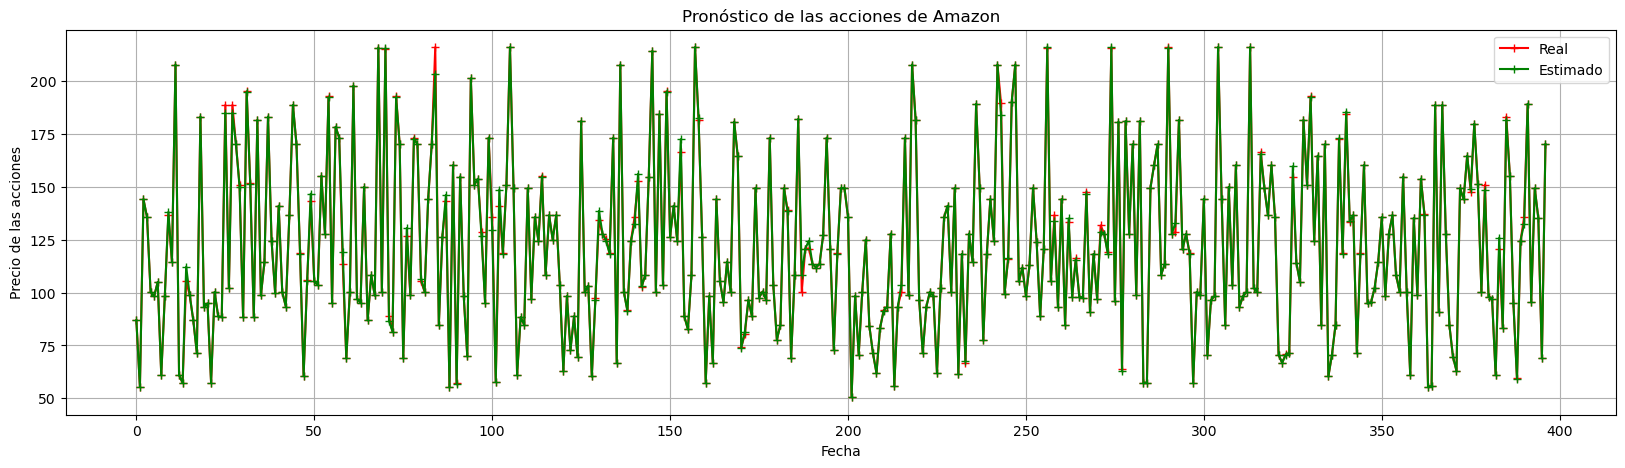

In [41]:
plt.figure(figsize=(20, 5))
plt.plot(Y_test, color='red', marker='+', label='Real')
plt.plot(Y_PronosticoBA, color='green', marker='+', label='Estimado')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Pronóstico de las acciones de Amazon')
plt.grid(True)
plt.legend()
plt.show()

In [42]:
Importancia = pd.DataFrame({'Variable': list(MDatos[['Open', 'High', 'Low']]),
                            'Importancia': PronosticoBA.feature_importances_}).sort_values('Importancia', ascending=False)
Importancia

,Variable,Importancia
1,High,0.485254
2,Low,0.308021
0,Open,0.206725


#### **Conformación del árbol**

In [43]:
Estimador = PronosticoBA.estimators_[99]
Estimador

DecisionTreeRegressor(max_features='auto', random_state=1396067212)

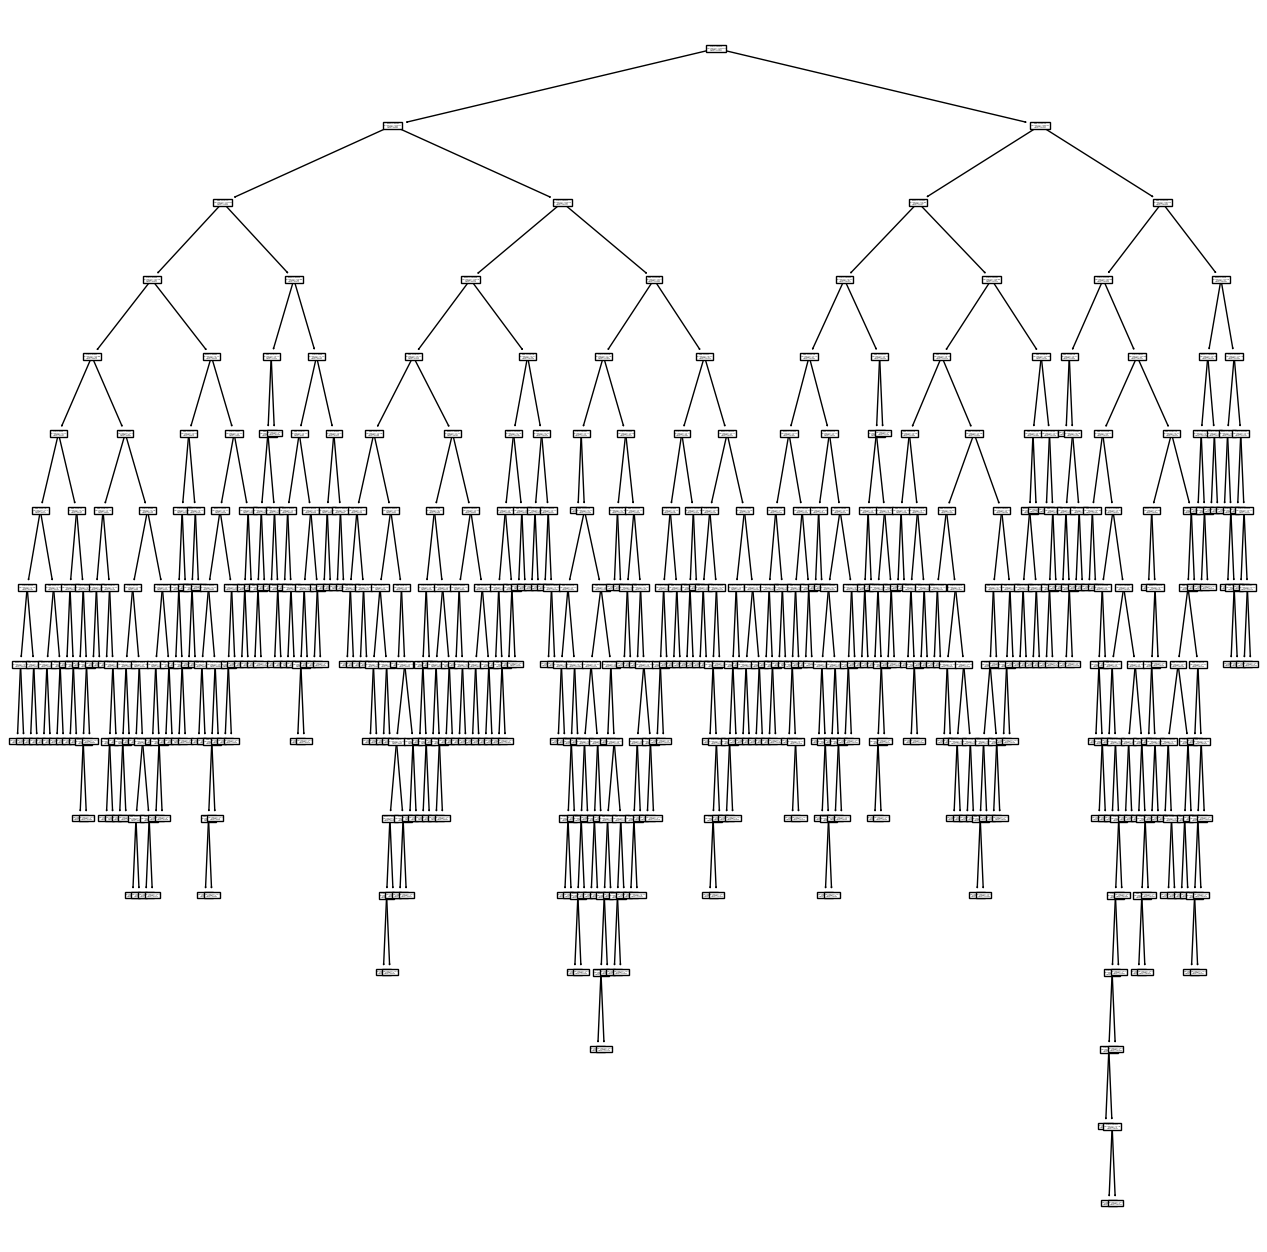

In [44]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16,16))  
plot_tree(Estimador, 
          feature_names = ['Open', 'High', 'Low'])
plt.show()

In [45]:
from sklearn.tree import export_text
Reporte = export_text(Estimador, 
                      feature_names = ['Open', 'High', 'Low'])
print(Reporte)

|--- Low <= 128.57
|   |--- Open <= 89.18
|   |   |--- High <= 74.09
|   |   |   |--- Low <= 64.36
|   |   |   |   |--- Low <= 57.60
|   |   |   |   |   |--- Low <= 53.96
|   |   |   |   |   |   |--- High <= 52.23
|   |   |   |   |   |   |   |--- Low <= 51.14
|   |   |   |   |   |   |   |   |--- Open <= 50.45
|   |   |   |   |   |   |   |   |   |--- value: [50.23]
|   |   |   |   |   |   |   |   |--- Open >  50.45
|   |   |   |   |   |   |   |   |   |--- value: [50.68]
|   |   |   |   |   |   |   |--- Low >  51.14
|   |   |   |   |   |   |   |   |--- High <= 51.62
|   |   |   |   |   |   |   |   |   |--- value: [51.61]
|   |   |   |   |   |   |   |   |--- High >  51.62
|   |   |   |   |   |   |   |   |   |--- value: [51.62]
|   |   |   |   |   |   |--- High >  52.23
|   |   |   |   |   |   |   |--- High <= 53.49
|   |   |   |   |   |   |   |   |--- Open <= 53.16
|   |   |   |   |   |   |   |   |   |--- value: [52.83]
|   |   |   |   |   |   |   |   |--- Open >  53.16
|   |   |   |   | 

#### **Nuevos pronósticos**

In [46]:
PrecioAccion = pd.DataFrame({'Open': [108.2],
                             'High': [112.2], 
                             'Low': [100.8]})
PronosticoBA.predict(PrecioAccion)

/Users/hugomeza/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([108.05075394])